In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading the ames training data as ames

ames = pd.read_csv("datasets/ames_housing.csv")

Based on our EDA, we are going to create a model to predict SalePrice variable using "Overall Qual", "Overall Cond" , "Fireplaces","Gr Liv Area","Full Bath", "Bedroom AbvGr", "Kitchen AbvGr", "Garage Cars".

In [3]:
# checking the datatype and null values in the numerical variable that we are going to use.
ames[["Overall Qual", "Overall Cond" , "Fireplaces","Gr Liv Area","Full Bath", "Bedroom AbvGr", "Kitchen AbvGr", "Garage Cars"
]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2051 non-null   int64  
 1   Overall Cond   2051 non-null   int64  
 2   Fireplaces     2051 non-null   int64  
 3   Gr Liv Area    2051 non-null   int64  
 4   Full Bath      2051 non-null   int64  
 5   Bedroom AbvGr  2051 non-null   int64  
 6   Kitchen AbvGr  2051 non-null   int64  
 7   Garage Cars    2050 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 128.3 KB


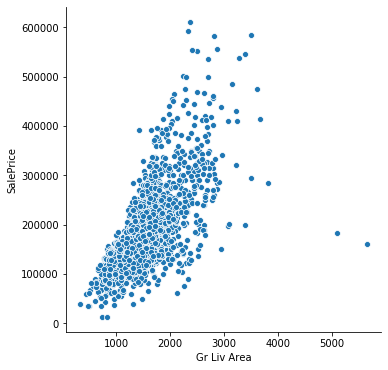

In [4]:
#  Looking at the distribution of Overall 


sns.pairplot(ames, x_vars=["Gr Liv Area"], y_vars=["SalePrice"], height=5);

As we saw earlier in the EDA section, there are 2 outliers. Here we see them again.

In [5]:
# sorting values based on Gr Liv Area in order to find the outliers.

ames.sort_values(by="Gr Liv Area", ascending=False).head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850
616,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1897,2738,905427030,75,RL,60.0,19800,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,12,2006,WD,415000
1035,2667,902400110,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,...,410,0,NaN,GdPrv,NaN,0,6,2006,WD,475000


In [6]:
# Dropping the outliers.

ames.drop(labels=[960, 1885], axis=0, inplace=True)

In EDA section, we also saw there are outliers in Full Bath, Bedroom, Kithcen as well. We are going to drop them also.

In [7]:
# sorting values based on Full Bath to identify the outliers.

ames.sort_values(by="Full Bath", ascending=False)["Full Bath"].head()

1566    4
1605    4
328     3
71      3
331     3
Name: Full Bath, dtype: int64

In [8]:
# Dropping the outliers.

ames.drop(labels=[1566, 1605], axis=0, inplace=True)

In [9]:
# sorting values based on Bedroom number to identify the outliers.

ames.sort_values(by="Bedroom AbvGr", ascending=False)["Bedroom AbvGr"].head()

858     8
1889    6
534     6
1451    6
984     6
Name: Bedroom AbvGr, dtype: int64

In [10]:
# Dropping the outliers.

ames.drop(labels=858, axis=0, inplace=True)

In [11]:
# we are sorting one more time to identify outliers in the other end.
# we are looking for expensive but 0 bedroom houses
ames.sort_values(by="Bedroom AbvGr", ascending=True)[["SalePrice","Bedroom AbvGr"]].head(5).sort_values(by="SalePrice", ascending=False)

,SalePrice,Bedroom AbvGr
1571,385000,0
1308,286000,0
191,279000,0
346,145000,0
744,108959,0


In [12]:
# Dropping the outliers.

ames.drop(labels=[1571, 1308, 191], axis=0, inplace=True)

In [13]:
# sorting values based on Kitchen number to identify the outliers.

ames.sort_values(by="Kitchen AbvGr", ascending=False)["Kitchen AbvGr"].head()

1359    3
290     2
1594    2
705     2
943     2
Name: Kitchen AbvGr, dtype: int64

In [14]:
# Dropping the outliers.

ames.drop(labels=1359, axis=0, inplace=True)

In [15]:
# there are null values in the Garage Cars. Since we are going to use this column, we will drop the null values.

ames.dropna(subset=["Garage Cars"], inplace=True)

In [16]:
# reading the testing dataset as ames_test

ames_test= pd.read_csv("datasets/test.csv")

In [17]:
# checking the test datatype and null values in the numerical variable that we are going to use.
ames_test[["Overall Qual", "Overall Cond" , "Fireplaces","Gr Liv Area","Full Bath", "Bedroom AbvGr", "Kitchen AbvGr", "Garage Cars"
]].info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Overall Qual   878 non-null    int64
 1   Overall Cond   878 non-null    int64
 2   Fireplaces     878 non-null    int64
 3   Gr Liv Area    878 non-null    int64
 4   Full Bath      878 non-null    int64
 5   Bedroom AbvGr  878 non-null    int64
 6   Kitchen AbvGr  878 non-null    int64
 7   Garage Cars    878 non-null    int64
dtypes: int64(8)
memory usage: 55.0 KB


In [18]:
# Creating features and assigning them to X. Assigning Salesprice as y (dependent variable)
features = ["Overall Qual", "Overall Cond" , "Fireplaces","Gr Liv Area","Full Bath", "Bedroom AbvGr", "Kitchen AbvGr", "Garage Cars"]


X = ames[features]
y = ames["SalePrice"]

print(X.shape)
print(y.shape)


# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X)


(2041, 8)
(2041,)


In [19]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X_overfit,
    y
)

In [20]:
# viewing the shape of our dataframe and series

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1530, 44) (511, 44)
(1530,) (511,)


In [21]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [22]:
# Instantiating the LinearRegression
lr = LinearRegression()

lr.fit(Z_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# calculating Rˆ2 score with cross_val_score() method
cross_val_score(lr, Z_train, y_train).mean()

0.8403796337552508

In [24]:
# creating predictions
y_pred_train = lr.predict(Z_train)
y_pred_test = lr.predict(Z_test)

In [25]:
# MSE of training

mse_train = round((mean_squared_error(y_train, y_pred_train)),2)
mse_train

927957683.75

In [26]:
# MSE of testing

mse_test = round((mean_squared_error(y_test, y_pred_test)),2)
mse_test

678909569.99

In [27]:
# RMSE of training

round((mean_squared_error(y_train, y_pred_train, squared=False)),2)

30462.4

In [28]:
# RMSE of testing

round((mean_squared_error(y_test, y_pred_test, squared=False)),2)

26055.89

In [29]:
#calculating Baseline-MSE

train_mean = [y_train.mean()]*len(y_train)
mse_baseline_train = mean_squared_error(y_train, train_mean)

test_mean = [y_test.mean()]*len(y_test)
mse_baseline_test = mean_squared_error(y_test, test_mean)

In [30]:
mse_train > mse_baseline_train

False

Our model outperfoms the baseline in training split data.

In [31]:
mse_test > mse_baseline_test

False

Our model outperfoms the baseline in testing split data.

In [32]:
# Instantiate.

ridge=Ridge(alpha=10)

# Fit.

ridge.fit(Z_train, y_train)

# Evaluate model using R2.

print(ridge.score(Z_train, y_train))
print(ridge.score(Z_test, y_test))

0.8582350531596373
0.8676394830209601


In [33]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.

ridge_alphas = np.logspace(0,3,11)


# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=ridge_alphas, # you do not actually give a range. it automatically finds.
                   scoring="r2",
                   cv=5
                  )


# Fit model using best ridge alpha!

ridge_cv.fit(Z_train, y_train)


RidgeCV(alphas=array([   1.        ,    1.99526231,    3.98107171,    7.94328235,
         15.84893192,   31.6227766 ,   63.09573445,  125.89254118,
        251.18864315,  501.18723363, 1000.        ]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring='r2',
        store_cv_values=False)

In [34]:
# Viewing the R-squared scores in Ridge cross validation.

print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

0.8588161161783074
0.8677389101761473


In [35]:
# Set up a list of Lasso alphas to check.
l_alphas=np.logspace(-3,0,100)


# Cross-validate over our list of Lasso alphas.
lasso_cv=LassoCV(alphas=l_alphas,
                cv=5)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train)

/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553823901319.958, tolerance: 813366235.3298458
  tol, rng, random, positive)
/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 355450223786.9331, tolerance: 813366235.3298458
  tol, rng, random, positive)
/Users/kemalcanalaeddinoglu/opt/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86502975279.34668, tolerance: 813366235.3298458
  tol, rng, random, positive)
/Users/kemalcanalaeddinoglu/opt/anaconda3

LassoCV(alphas=array([0.001     , 0.00107227, 0.00114976, 0.00123285, 0.00132194,
       0.00141747, 0.00151991, 0.00162975, 0.00174753, 0.00187382,
       0.00200923, 0.00215443, 0.00231013, 0.00247708, 0.00265609,
       0.00284804, 0.00305386, 0.00327455, 0.00351119, 0.00376494,
       0.00403702, 0.00432876, 0.00464159, 0.00497702, 0.0053367 ,
       0.00572237, 0.00613591, 0.00657933, 0.0070548 , 0.00756463,
       0.008...
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [36]:
# Viewing the R-squared scores in LASSO cross validation.

print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.8605974492426911
0.8657472783678708


In [37]:
# Creating features and assigning them to X.

test_X = ames_test[features]

print(test_X.shape)


# Fit and transform our test_X data.
text_X_overfit = poly.transform(test_X)

(878, 8)


In [38]:
# transforming the test data
ames_test_X_test_scaled = sc.transform(text_X_overfit)


In [39]:
# predicting salesprices

test_y_predict = lr.predict(ames_test_X_test_scaled)

In [40]:
# creating a dataframe with ID and salesprice columns

model_12 = pd.DataFrame({"Id":ames_test["Id"], "SalePrice":test_y_predict})

In [41]:
# exporting the dataframe as csv

model_12.to_csv("./datasets/model_12_submission.csv", index=False)